<a href="https://colab.research.google.com/github/Rashida-Rangwala/Yulu_Casestudy/blob/main/Yulu_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!



**Problem Statement**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Yulu wants to know**

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yulu_bike_sharing.csv to yulu_bike_sharing.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("yulu_bike_sharing.csv")

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.describe(include=["object"])

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


After looking at the dataset provided, we can say that there are no null values in the sample provided. **So, there is no need of missing value treatment.**


Also the datatypes of all columns expect Datetime is integer or float.
The Datatime column is a object.



**Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

# **Univariate Analysis**

<AxesSubplot:xlabel='season', ylabel='count'>

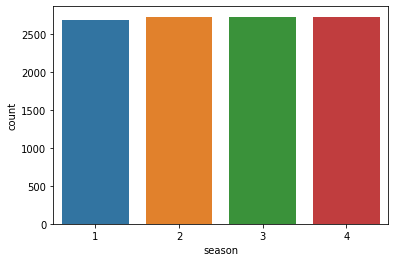

In [ ]:
sns.countplot(data = df, x = "season")

A count plot for season shows that alll seasons have same distribution of bike rides. There is no prefered season as such.

In [ ]:
df["season"].value_counts(normalize=True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

<AxesSubplot:xlabel='weather', ylabel='count'>

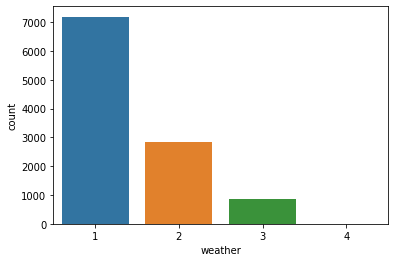

In [ ]:
sns.countplot(data = df, x = "weather")

<AxesSubplot:>

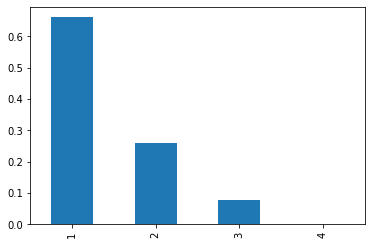

In [ ]:
df["weather"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
df["weather"].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

We can say that weather is considerably one of the factors affecting bike rides. When the weather is Clear, Few clouds, partly cloudy, partly cloudy there are more rides while when the weather is Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow or Fog then hardly any rides are booked.

On working day, people prefer taking rides more than non working days as seen from the below graph.

<AxesSubplot:xlabel='workingday', ylabel='count'>

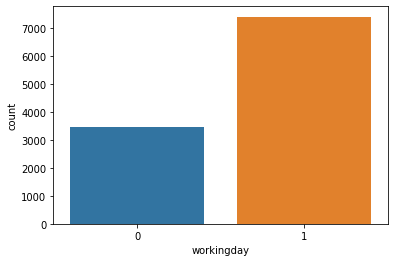

In [ ]:
sns.countplot(data = df, x = "workingday")

On holidays, people don't seem to use the services much as seen from the below graph.

<AxesSubplot:xlabel='holiday', ylabel='count'>

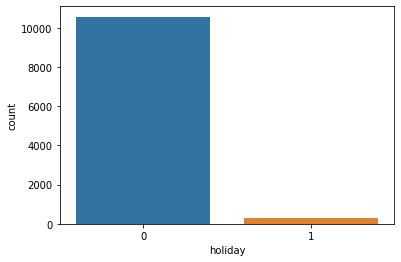

In [ ]:
sns.countplot(data = df, x = "holiday")

**Checking the distribution of the continous variables**

Histplot on casual, registered and total rides looks RIGHT SKEWED.


This data needs to be treated. We can try taking log of the same and check if it forms log normal distribution or not.

<AxesSubplot:xlabel='casual', ylabel='Count'>

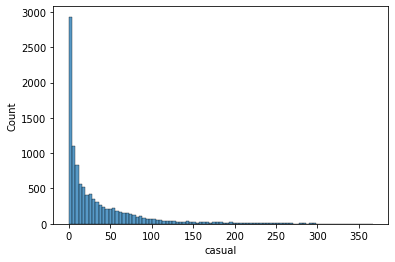

In [ ]:
sns.histplot(df, x = "casual")

<AxesSubplot:xlabel='registered', ylabel='Count'>

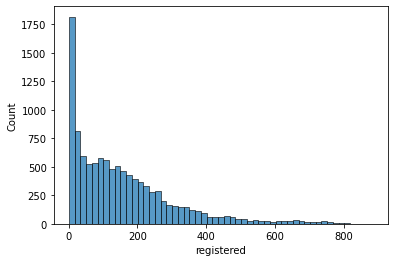

In [ ]:
sns.histplot(df, x = "registered")

<AxesSubplot:xlabel='count', ylabel='Count'>

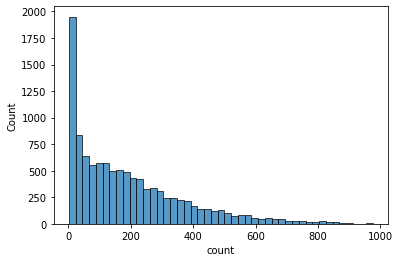

In [ ]:
sns.histplot(df, x = "count")

temp, atemp and humidity looks normally distributed but we need to apply proper checks to it before reaching the conclusion.

<AxesSubplot:xlabel='temp', ylabel='Count'>

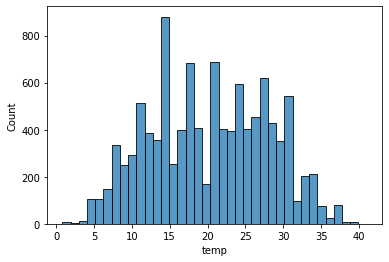

In [ ]:
sns.histplot(df, x = "temp")

<AxesSubplot:xlabel='atemp', ylabel='Count'>

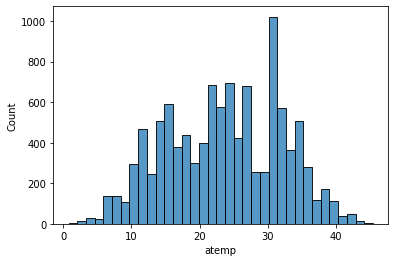

In [ ]:
sns.histplot(df, x = "atemp")

<AxesSubplot:xlabel='humidity', ylabel='Count'>

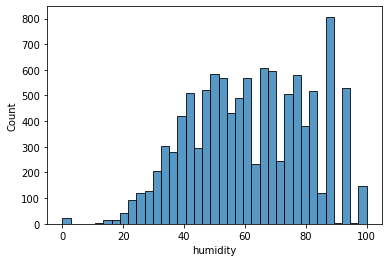

In [ ]:
sns.histplot(df, x = "humidity")

Windspeed looks right skewed, if there is less windspeed then more rides are happening. This data also needs to be checked for normality by taking log.

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

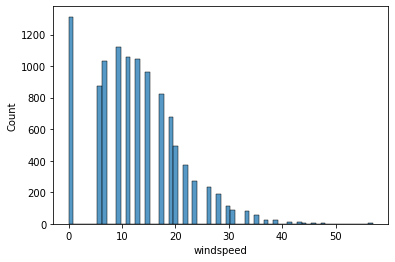

In [ ]:
sns.histplot(df, x = "windspeed")

# **Bivariate Analysis**

<AxesSubplot:xlabel='workingday', ylabel='count'>

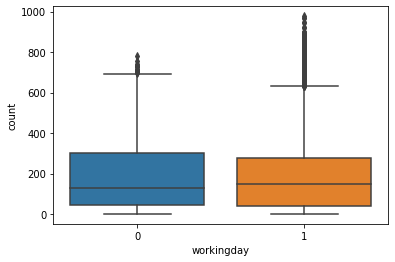

In [ ]:
sns.boxplot(data = df, x = "workingday", y ="count")

The median of working day and non working day seem almost similar.

There are more outliers on the working day.

<AxesSubplot:xlabel='holiday', ylabel='count'>

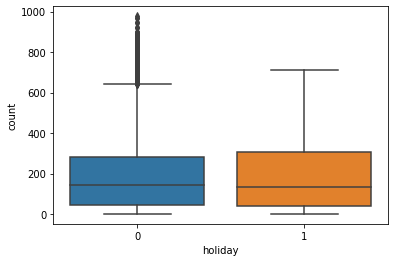

In [ ]:
sns.boxplot(data = df, x = "holiday", y ="count")

The median of holiday and non holiday seem almost similar.

There are more outliers on non holiday.

We can say that the holiday column and working day column are vice versa.

<AxesSubplot:xlabel='season', ylabel='count'>

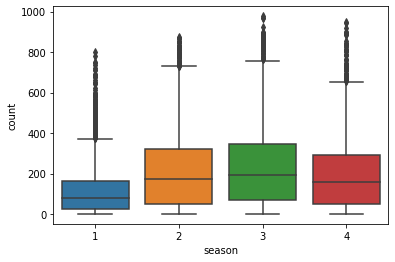

In [ ]:
sns.boxplot(data = df, x = "season", y ="count")

The medians of season 2 - Summer and 3 - Fall is little bit more than 4 - Winter. The least median is of 1 - Spring.

All the seasons are seeing some outliers.

<AxesSubplot:xlabel='weather', ylabel='count'>

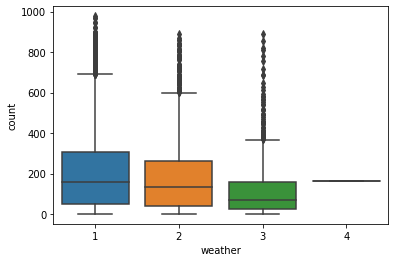

In [ ]:
sns.boxplot(data = df, x = "weather", y ="count")

Looking at the weather and bike ride relationship, the adverse weather 4 - Heavy rains is expected to see least bike ride bookings while weather 1 - clear weather and 2 - Mist and cloudy have similar medians.

The median of weather 3 - Light snow, rain is little lower than the 1st and 2nd weather.

# **Hypothesis Testing**

# **2- Sample T-Test**

**Scenario 1: Working day effect**

Ho : Working day has no effect on the number of electric cycles rented

Ha: Working day has an effect

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented

Right Tailed test : Mean of working day greater than mean of non working day is tested

In [ ]:
df_working_day = df[df["workingday"] == 1]
mean_working_day = df_working_day["count"].mean()

df_non_working_day = df[df["workingday"] == 0]
mean_non_working_day = df_non_working_day["count"].mean()

print("Mean of Working day :", mean_working_day)
print("Mean of Non Working day :", mean_non_working_day)

Mean of Working day : 193.01187263896384
Mean of Non Working day : 188.50662061024755


In [ ]:
from scipy.stats import ttest_ind,  ttest_1samp

t_stat, p_val = ttest_ind(df_working_day["count"], df_non_working_day["count"], alternative = "greater")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

1.2096277376026694 0.11322402113180674
Fail to Reject Null Hypothesis


**Result of ttest on Working day data - The slight difference in mean is not significant to reject the Null Hypothesis.**

So, we Fail to Reject H0 and believe that the rides on working day and non working day are similar.

**Scenario 2 : Holiday Effect**

Ho : Holiday has no effect on the number of electric cycles rented

Ha: Holiday has an effect

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented


In [ ]:
df_holiday = df[df["holiday"] == 1]
mean_holiday = df_holiday["count"].mean()

df_non_holiday = df[df["holiday"] == 0]
mean_non_holiday = df_non_holiday["count"].mean()

print("Mean of Holiday :", mean_holiday)
print("Mean of Non Holiday :", mean_non_holiday)

Mean of Holiday : 185.87781350482314
Mean of Non Holiday : 191.7416548463357


In [ ]:
from scipy.stats import ttest_ind,  ttest_1samp

t_stat, p_val = ttest_ind(df_holiday["count"], df_non_holiday["count"], alternative = "greater")

print(t_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

-0.5626388963477119 0.7131538058364448
Fail to Reject Null Hypothesis


**Result of ttest on Holiday data - The slight difference in mean is not significant to reject the Null Hypothesis.**

So, we Fail to Reject H0 and believe that the rides on holiday and a non holiday are similar.

# **ANOVA**


Performing ANOVA test to check if No. of cycles rented is similar or different in  
1. Different Weather
2. Different Season

**Scenario 1 : Weather Effect**

Ho : Weather has no effect on the number of electric cycles rented

Ha: Weather has an effect

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented


In [ ]:
df_weather_1 = df[df["weather"] == 1]
mean_weather_1 = df_weather_1["count"].mean()

df_weather_2 = df[df["weather"] == 2]
mean_weather_2 = df_weather_2["count"].mean()

df_weather_3 = df[df["weather"] == 3]
mean_weather_3 = df_weather_3["count"].mean()

df_weather_4 = df[df["weather"] == 4]
mean_weather_4 = df_weather_4["count"].mean()

print("Mean of Weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) :", mean_weather_1)
print("Mean of Weather 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) :", mean_weather_2)
print("Mean of Weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) :", mean_weather_3)
print("Mean of Weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) :", mean_weather_4)

Mean of Weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) : 205.23679087875416
Mean of Weather 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) : 178.95553987297106
Mean of Weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) : 118.84633294528521
Mean of Weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) : 164.0


In [ ]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(df_weather_1["count"], df_weather_2["count"], df_weather_3["count"], df_weather_4["count"])

print(f_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

65.53024112793271 5.482069475935669e-42
Reject Null Hypothesis


As we can see above, the p value is extremely less than significance value - (alpha - 0.05). So, we Reject the Null Hypothesis which said that the mean of all weathers is same.

**We can strongly say that Weather has a extreme effect on number of bicycles rented.**

**Scenario 2 : Season Effect**

Ho : Season has no effect on the number of electric cycles rented

Ha: Season has an effect

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

Test_statistic : Mean of count of bicycles rented


In [ ]:
df_season_1 = df[df["season"] == 1]
mean_season_1 = df_season_1["count"].mean()

df_season_2 = df[df["season"] == 2]
mean_season_2 = df_season_2["count"].mean()

df_season_3 = df[df["season"] == 3]
mean_season_3 = df_season_3["count"].mean()

df_season_4 = df[df["season"] == 4]
mean_season_4 = df_season_4["count"].mean()

print("Mean of season 1 (Spring) :", mean_season_1)
print("Mean of season 2 (Summer) :", mean_season_2)
print("Mean of season 3 (Fall) :", mean_season_3)
print("Mean of season 4 (Winter) :", mean_season_4)

Mean of season 1 (Spring) : 116.34326135517499
Mean of season 2 (Summer) : 215.25137211855105
Mean of season 3 (Fall) : 234.417124039517
Mean of season 4 (Winter) : 198.98829553767374


In [ ]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(df_season_1["count"], df_season_2["count"], df_season_3["count"], df_season_4["count"])

print(f_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

236.94671081032106 6.164843386499654e-149
Reject Null Hypothesis


As we can see above, the p value is extremely less than significance value - (alpha - 0.05). So, we Reject the Null Hypothesis which said that the mean of all seasons is same.

**We can strongly say that Seasons have an extreme effect on number of bicycles rented.**

# **Chi-square test to check if Weather is dependent on the season**

Ho : Weather is not dependent on Season

Ha: Weather is dependent on Season

Alpha : 0.05 (Taking 0.05 as the significance value, ie., 95 % Confidence)

In [ ]:
weather_season = pd.crosstab(index = df["weather"], columns = df["season"], margins= True)
weather_season

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:
from scipy.stats import chi2_contingency
chi_stat, p_val, dof, expected = chi2_contingency(weather_season)

print(chi_stat, p_val, dof, expected)

49.15865559689363 1.5499250736864862e-07 9 [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


After applying the chi2_contigency test, we observe that the p value is very less in comparision to alpha(0.05), so we can say that the Weather is dependent on Season.

**So, we Reject Null Hypothesis which says Season and Weather is not dependent on each other.**

# Checking if the Weather data is Gaussian or not

**Weather 1**

<AxesSubplot:xlabel='count', ylabel='Count'>

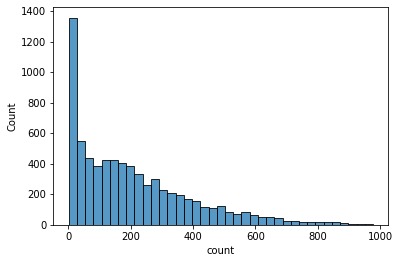

In [ ]:
from scipy.stats import norm
from scipy.stats import shapiro, kstest
from statsmodels.graphics.gofplots import qqplot

sns.histplot(df_weather_1, x = "count")

**Qq plot**

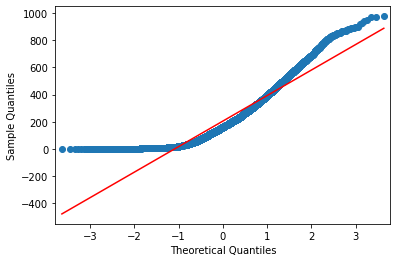

In [ ]:
qqplot(df_weather_1["count"], line = "s")
plt.show()

Ho: Data is Gaussian

Ha: Data is not Gaussion

**Shapiro**

In [ ]:
weather_1_subset = df_weather_1["count"].sample(100)

test_stat, p_val = shapiro(weather_1_subset)

print(test_stat, p_val)

0.9245321750640869 2.4687227778485976e-05


In [ ]:
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


According to the Shapiro test, Weather data provided is not Gaussian.

**KS test**

In [ ]:
test_stat, p_val = kstest(weather_1_subset, norm.cdf, args=(weather_1_subset.mean(), weather_1_subset.std()))

print(test_stat, p_val)

0.109929326061388 0.16548491875280583


In [ ]:
if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


According to the KS test, Weather data provided is Gaussian.

**Conclusion : If one test says that the data is Gaussian then we continue to believe that the data is Gaussian.**

**Weather 2**

<AxesSubplot:xlabel='count', ylabel='Count'>

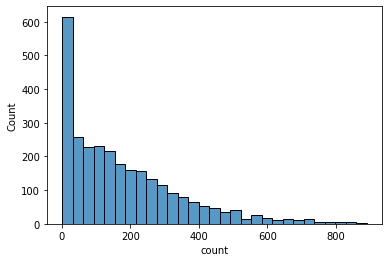

In [ ]:
sns.histplot(df_weather_2, x = "count")

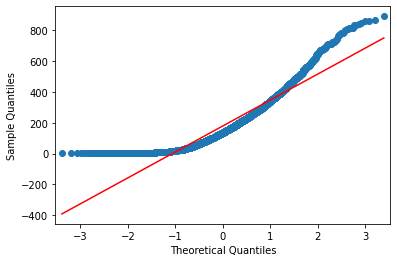

In [ ]:
qqplot(df_weather_2["count"], line = "s")
plt.show()

In [ ]:
weather_2_subset = df_weather_2["count"].sample(100)

test_stat, p_val = shapiro(weather_2_subset)

print(test_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.8867121338844299 3.529593186613056e-07
Reject Null Hypothesis


In [ ]:
test_stat, p_val = kstest(weather_2_subset, norm.cdf, args=(weather_2_subset.mean(), weather_2_subset.std()))

print(test_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.14806138627713367 0.022319103965612583
Reject Null Hypothesis


**After applying Qqplot, Shapiro test and KS test, Weather 2 data still doesn't follow Gaussian.**

# Boxcox

**To solve this problem, using Boxcox over the sample data of weather 2**

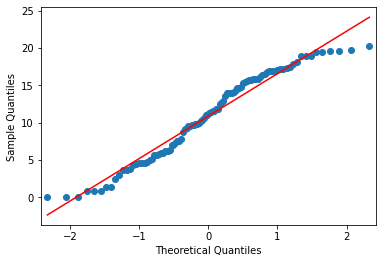

In [ ]:
from scipy.stats import boxcox

transformed_data_weather_2 = boxcox(weather_2_subset)[0]

qqplot(transformed_data_weather_2, line = "s")
plt.show()

In [ ]:
test_stat, p_val = shapiro(transformed_data_weather_2)

print(test_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.9553460478782654 0.0018991273827850819
Reject Null Hypothesis


In [ ]:
test_stat, p_val = kstest(transformed_data_weather_2, norm.cdf, args=(transformed_data_weather_2.mean(), transformed_data_weather_2.std()))

print(test_stat, p_val)

if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

0.10276067065501271 0.2255791951128784
Fail to Reject Null Hypothesis


**Conclusion : If one test says that the data is Gaussian then we continue to believe that the data is Gaussian. Here, the transformed data now follows Gaussian distribution.**

**Weather 3**

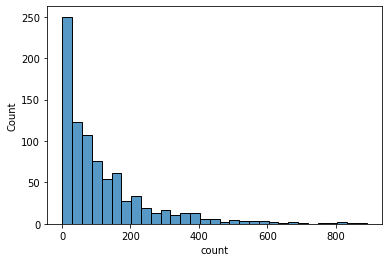

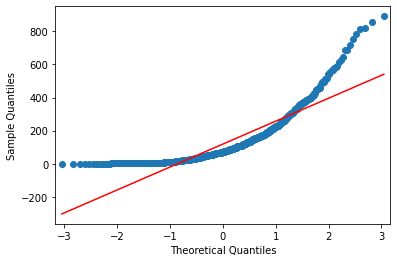

Shapiro Test: 
0.7809067368507385 6.68552643801057e-11
Reject Null Hypothesis
----------------------------------------------------------------------------------------------------
KS Test: 
0.1969969068773601 0.0007088127142595764
Reject Null Hypothesis


In [ ]:
sns.histplot(df_weather_3, x = "count")


qqplot(df_weather_3["count"], line = "s")
plt.show()
weather_3_subset = df_weather_3["count"].sample(100)


test_stat, p_val = shapiro(weather_3_subset)

print("Shapiro Test: ")
print(test_stat, p_val)


if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")
test_stat, p_val = kstest(weather_3_subset, norm.cdf, args=(weather_3_subset.mean(), weather_3_subset.std()))

print("--" * 50)
print("KS Test: ")
print(test_stat, p_val)


if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Weather 3 follows same pattern as weather 2. The data is not Gaussian.

Applying boxcox to make it Gaussian.

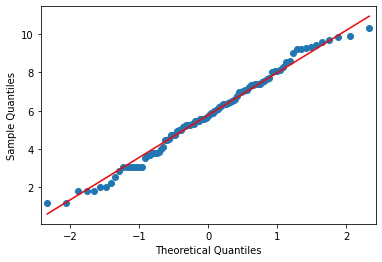

Shapiro Test: 
0.983220100402832 0.234780952334404
Fail to Reject Null Hypothesis
----------------------------------------------------------------------------------------------------
KS test: 
0.05908002148367339 0.8556347916387363
Fail to Reject Null Hypothesis


In [ ]:
from scipy.stats import boxcox


transformed_data_weather_3 = boxcox(weather_3_subset)[0]


qqplot(transformed_data_weather_3, line = "s")
plt.show()
test_stat, p_val = shapiro(transformed_data_weather_3)

print("Shapiro Test: ")
print(test_stat, p_val)


if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")
test_stat, p_val = kstest(transformed_data_weather_3, norm.cdf, args=(transformed_data_weather_3.mean(), transformed_data_weather_3.std()))

print("--"*50)
print("KS test: ")
print(test_stat, p_val)


if(p_val < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

**After applying boxcox for Weather 3, the data is now transformed to Gaussian distribution.**

# **Correlation**

In [ ]:
corr=df['temp'].corr(df['count'])
print(corr)

0.394453644967249


In [ ]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


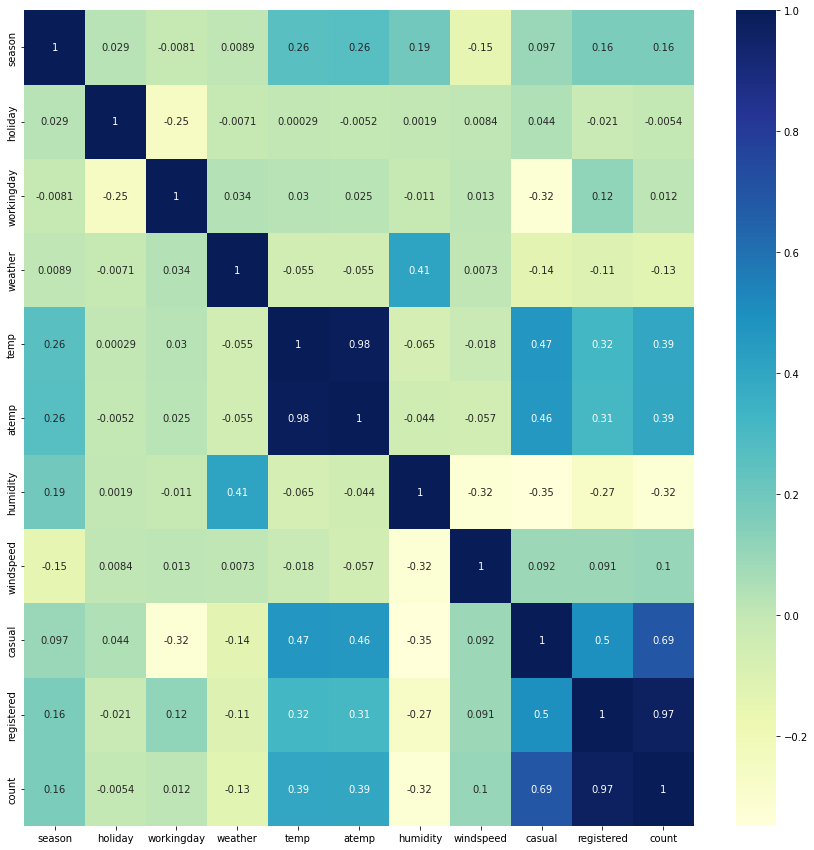

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**The positive value of correlation between Temprature and Count indicate that bicycle rentals sligthly depend on temperature also.**

# **Conclusion**

Yulu is facing losses because of lower demand of electric bicycles as seen in the data provided above.

The factors analysed above were demand on a working day, holiday, across different seasons, different weather conditions and temparature.

It is seen that the demand is higher on clear weather days as people tend to enjoy riding bicycles on those days.

While it is very difficult for people to ride an electric vehicle during rain, snow, heavy wind, etc. so the demand is very low during that time.

Seasons also have a similar effect like weather.

Holiday or working day doesn't have much effect on the rides. People prefer it during both.

# **Recommendations**
As the issues of less bicycle rentals are happening due to the climatic conditions so I would like to recommend the following -
1.   Yulu should reduce the rate/price when the weather or season is not favourable. Usually all other transports, increase their pricing so this can be one attraction.
2.   Yulu should try to offer some protection options like in rainy season assure customers that it is safe to ride a electric vehicle and have some safety equipments like raincoats, helmets, etc available with the bicycle.
3. Yulu should offer exiciting packages/deals during office hours on workdays so that people try to use bicycles instead of buses/cars.
4. Yulu should also try to advertise itself as Environment safe company and try to lure people towards environment protection.
5. On holidays, discounts can be offered for multiple bicycle bookings by one account as usually friends and family groups plan to go out and if discount is offered it might attract them.
6. During high temprature, the probablility of using bicycle is low, so they can also make some refreshing stations where people can get some drink and rest for a while if they are travelling far.

